In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
books_df=pd.read_csv("/content/drive/MyDrive/Almabetter/capstone projects/Book Recommendation System/Dataset/Books.csv")


In [4]:
ratings_df=pd.read_csv("/content/drive/MyDrive/Almabetter/capstone projects/Book Recommendation System/Dataset/Ratings.csv")
ratings_df.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [5]:
users_df=pd.read_csv("/content/drive/MyDrive/Almabetter/capstone projects/Book Recommendation System/Dataset/Users.csv")
users_df.head(3)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


##***Data Preprocessing*** and ***Exploratory Data Analysis***


**1. Books Dataset**

In [6]:
books_df.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [7]:
books_df.shape

(271360, 8)

In [8]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [9]:
## Checking for null values
books_df.isnull().sum() 

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [10]:
list(books_df['Year-Of-Publication'].unique())


[2002,
 2001,
 1991,
 1999,
 2000,
 1993,
 1996,
 1988,
 2004,
 1998,
 1994,
 2003,
 1997,
 1983,
 1979,
 1995,
 1982,
 1985,
 1992,
 1986,
 1978,
 1980,
 1952,
 1987,
 1990,
 1981,
 1989,
 1984,
 0,
 1968,
 1961,
 1958,
 1974,
 1976,
 1971,
 1977,
 1975,
 1965,
 1941,
 1970,
 1962,
 1973,
 1972,
 1960,
 1966,
 1920,
 1956,
 1959,
 1953,
 1951,
 1942,
 1963,
 1964,
 1969,
 1954,
 1950,
 1967,
 2005,
 1957,
 1940,
 1937,
 1955,
 1946,
 1936,
 1930,
 2011,
 1925,
 1948,
 1943,
 1947,
 1945,
 1923,
 2020,
 1939,
 1926,
 1938,
 2030,
 1911,
 1904,
 1949,
 1932,
 1928,
 1929,
 1927,
 1931,
 1914,
 2050,
 1934,
 1910,
 1933,
 1902,
 1924,
 1921,
 1900,
 2038,
 2026,
 1944,
 1917,
 1901,
 2010,
 1908,
 1906,
 1935,
 1806,
 2021,
 '2000',
 '1995',
 '1999',
 '2004',
 '2003',
 '1990',
 '1994',
 '1986',
 '1989',
 '2002',
 '1981',
 '1993',
 '1983',
 '1982',
 '1976',
 '1991',
 '1977',
 '1998',
 '1992',
 '1996',
 '0',
 '1997',
 '2001',
 '1974',
 '1968',
 '1987',
 '1984',
 '1988',
 '1963',
 '1956',
 

In [11]:
pd.set_option('display.max_colwidth', -1)
books_df.loc[books_df['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [12]:
books_df.loc[books_df['Year-Of-Publication'] == 'Gallimard',:]


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN


In [13]:
books_df.at[209538 ,'Publisher'] = 'DK Publishing Inc'
books_df.at[209538 ,'Year-Of-Publication'] = 2000
books_df.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books_df.at[209538 ,'Book-Author'] = 'Michael Teitelbaum'

books_df.at[221678 ,'Publisher'] = 'DK Publishing Inc'
books_df.at[221678 ,'Year-Of-Publication'] = 2000
books_df.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books_df.at[209538 ,'Book-Author'] = 'James Buckley'

books_df.at[220731 ,'Publisher'] = 'Gallimard'
books_df.at[220731 ,'Year-Of-Publication'] = '2003'
books_df.at[209538 ,'Book-Title'] = 'Peuple du ciel - Suivi de Les bergers '
books_df.at[209538 ,'Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'

<font color='blue'>As it can be seen from above that there are some incorrect entries in Year-Of-Publication field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as Year-Of-Publication in dataset due to some errors in csv file 

In [14]:
books_df['Year-Of-Publication']=pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')

print(sorted(books_df['Year-Of-Publication'].unique()))


[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


<font color='blue'>The value 0 for Year-Of_Publication is invalid and as this dataset was published in 2004, We have assumed that the years after 2006 to be 
invalid and setting invalid years as NaN

Reference of the fact: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

In [15]:
books_df.loc[(books_df['Year-Of-Publication'] > 2006) | (books_df['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

#replacing NaNs with median value of Year-Of-Publication
books_df['Year-Of-Publication'].fillna(round(books_df['Year-Of-Publication'].median()), inplace=True)

In [16]:
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [17]:
books_df.loc[books_df.Publisher.isnull(),:]


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN,http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg


In [18]:
books_df.Publisher.fillna('others',inplace=True)

In [19]:
books_df.loc[books_df['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995.0,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.LZZZZZZZ.jpg


In [20]:
books_df['Book-Author'].fillna('others',inplace=True)

In [21]:
books_df.loc[books_df['Image-URL-L'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,Peuple du ciel - Suivi de Les bergers,Jean-Marie Gustave Le ClÃ?Â©zio,2000.0,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,2003.0,Gallimard,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,2000.0,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [22]:
books_df['Image-URL-L'].fillna('others',inplace=True)

In [23]:
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [24]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 271360 non-null  object 
 1   Book-Title           271360 non-null  object 
 2   Book-Author          271360 non-null  object 
 3   Year-Of-Publication  271360 non-null  float64
 4   Publisher            271360 non-null  object 
 5   Image-URL-S          271360 non-null  object 
 6   Image-URL-M          271360 non-null  object 
 7   Image-URL-L          271360 non-null  object 
dtypes: float64(1), object(7)
memory usage: 16.6+ MB


**2. Ratings dataset**

In [25]:
ratings_df.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [26]:
## Checking for null values
ratings_df.isnull().sum() 

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [27]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [28]:
print("Shape of dataset before dropping",ratings_df.shape)
ratings_df = ratings_df[ratings_df.ISBN.isin(books_df.ISBN)]
print("shape of dataset after dropping",ratings_df.shape)

Shape of dataset before dropping (1149780, 3)
shape of dataset after dropping (1031136, 3)


**3. Users Dataset**

In [29]:
users_df.head(3)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [30]:
users_df.isna().sum()

User-ID     0     
Location    0     
Age         110762
dtype: int64

In [31]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Text(0.5, 1.0, 'Find outlier data in Age column')

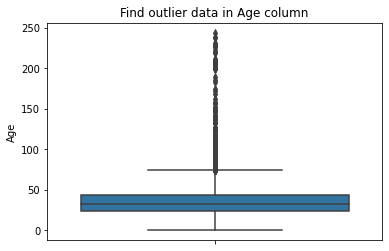

In [32]:
sns.boxplot(y='Age', data=users_df)
plt.title('Find outlier data in Age column')

In [33]:
# extreme = users_df[users_df['Age'] <= 80]
# extreme = extreme[extreme['Age'] >= 10]
median_value = round(users_df['Age'].median())   
users_df.loc[users_df['Age'] > 80, 'Age'] = median_value    #outliers with age grater than 80 are substituted with mean 
users_df.loc[users_df['Age'] < 10, 'Age'] = median_value   #outliers with age less than 10 years are substitued with mean


In [34]:
users_df['Age'] = users_df['Age'].fillna(median_value)      #filling null values with mean
users_df['Age'] = users_df['Age'].astype(int) 

In [35]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   User-ID   278858 non-null  int64 
 1   Location  278858 non-null  object
 2   Age       278858 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.4+ MB


Merge Datasets


In [36]:
data=pd.merge(books_df,ratings_df,on='ISBN')
data=pd.merge(data,users_df,on='User-ID')


In [37]:
data.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg,2,0,"stockton, california, usa",18
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,8,5,"timmins, ontario, canada",32
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg,8,0,"timmins, ontario, canada",32


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031136 non-null  object 
 1   Book-Title           1031136 non-null  object 
 2   Book-Author          1031136 non-null  object 
 3   Year-Of-Publication  1031136 non-null  float64
 4   Publisher            1031136 non-null  object 
 5   Image-URL-S          1031136 non-null  object 
 6   Image-URL-M          1031136 non-null  object 
 7   Image-URL-L          1031136 non-null  object 
 8   User-ID              1031136 non-null  int64  
 9   Book-Rating          1031136 non-null  int64  
 10  Location             1031136 non-null  object 
 11  Age                  1031136 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 102.3+ MB


Text(0.5, 1.0, 'No of books by an author (Top 15)')

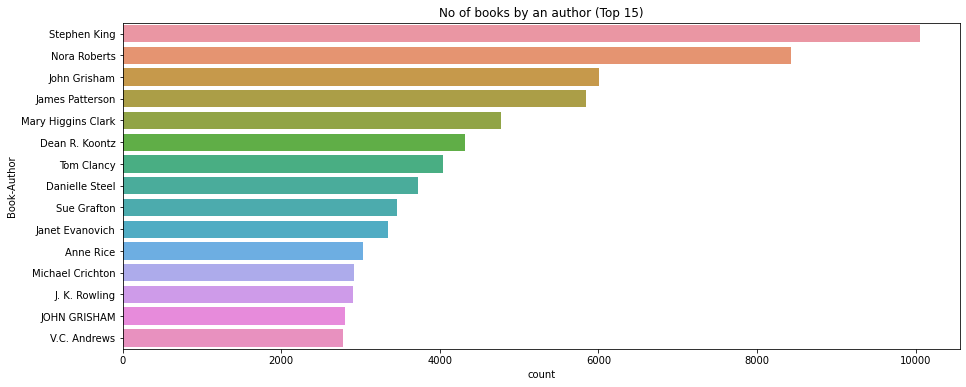

In [39]:
plt.figure(figsize=(15,6))
sns.countplot(y="Book-Author", data=data, order=data['Book-Author'].value_counts().index[0:15])
plt.title("No of books by an author (Top 15)")

Text(0.5, 1.0, 'No of books published in particular year (Top 15)')

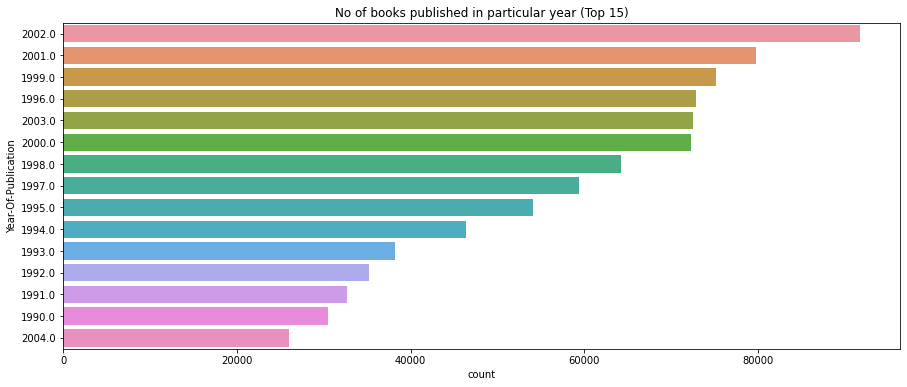

In [40]:
plt.figure(figsize=(15,6))
sns.countplot(y="Year-Of-Publication", data=data, order=data['Year-Of-Publication'].value_counts().index[0:15])
plt.title("No of books published in particular year (Top 15)")

Text(0.5, 1.0, 'No of books published in particular year (Top 15)')

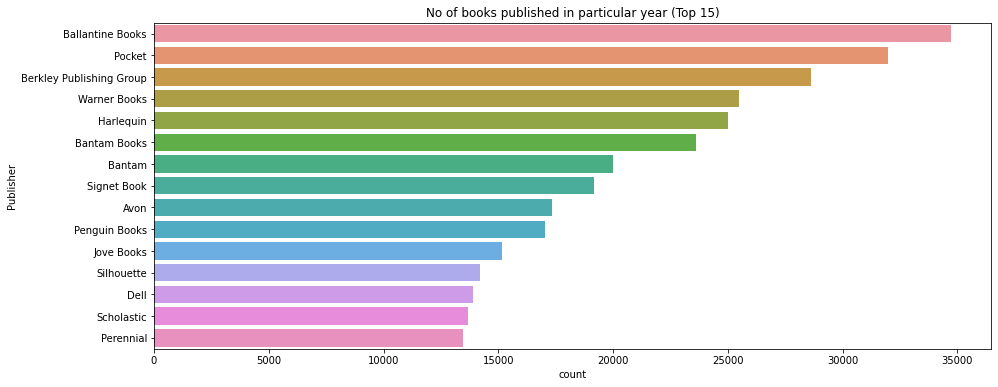

In [41]:
plt.figure(figsize=(15,6))
sns.countplot(y="Publisher", data=data, order=data['Publisher'].value_counts().index[0:15])
plt.title("No of books published in particular year (Top 15)")

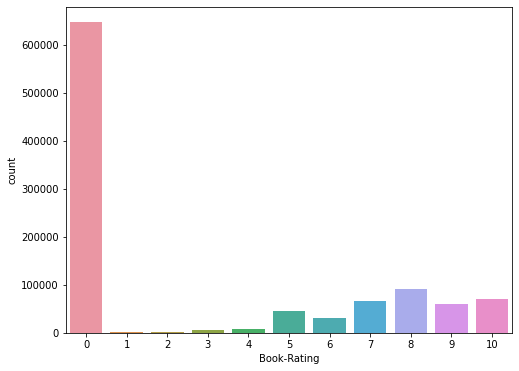

In [42]:
plt.figure(figsize=(8,6))
sns.countplot(x="Book-Rating", data=data)

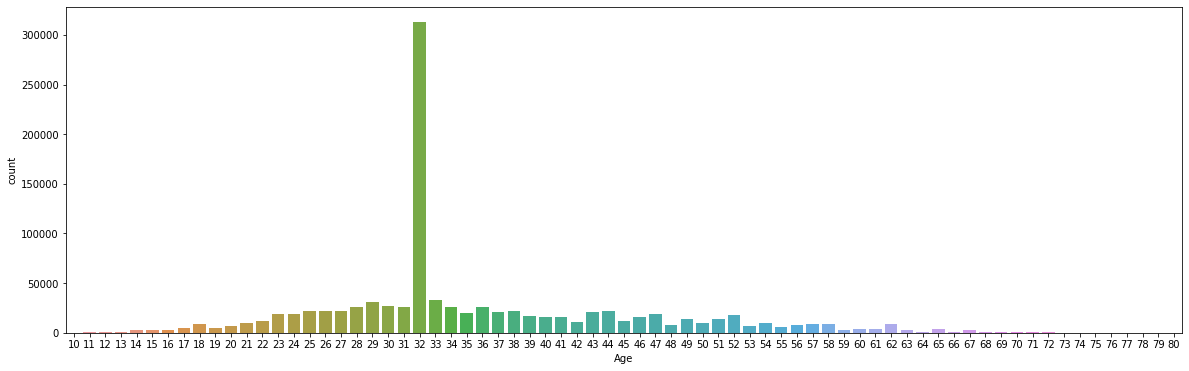

In [43]:
plt.figure(figsize=(20,6))
sns.countplot(x="Age", data=data)

In [44]:
data['Country']= [(i.split(',')[2]) for i in data['Location']]
data['State']= [(i.split(',')[1]) for i in data['Location']]


In [45]:
data['Country'] = data['Country'].replace({" ":'Other', ' n/a':'Other',  '\\"n/a\\""' :'Other'})
data['State'] = data['State'].replace({" ":'Other', ' n/a':'Other',  '\\"n/a\\""' :'Other'})

In [46]:
data.drop(['Location'], axis=1,inplace=True)

In [47]:
data.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Age,Country,State
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg,2,0,18,usa,california
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,8,5,32,canada,ontario
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg,8,0,32,canada,ontario


Text(0.5, 1.0, 'No of books published in particular year (Top 15)')

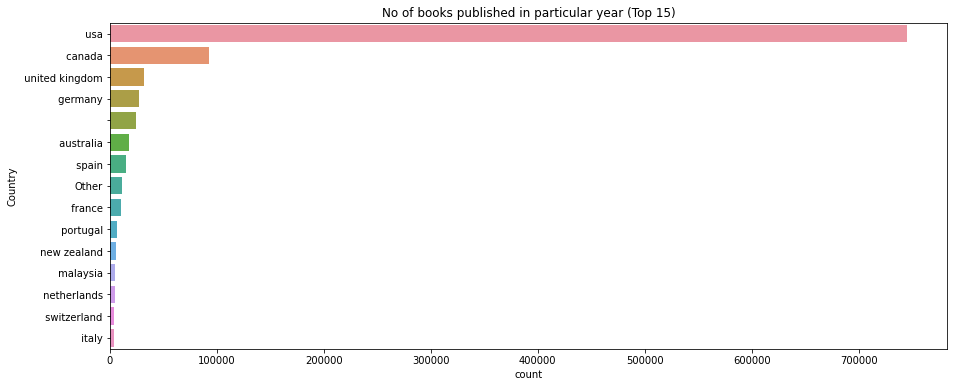

In [48]:
plt.figure(figsize=(15,6))
sns.countplot(y="Country", data=data, order=data['Country'].value_counts().index[0:15])
plt.title("No of books published in particular year (Top 15)")

In [49]:
#grouby neighbourhood groups and find number of reviews per group. Arranged in decreasing fashion of reviews
areas_reviews = data.groupby(['Country'])['Book-Rating'].sum().reset_index().sort_values(by = 'Book-Rating', ascending = False)[:5]
areas_reviews.head(5)

,Country,Book-Rating
372,usa,2010028
63,canada,266946
360,united kingdom,110426
126,germany,90116
0,,79250


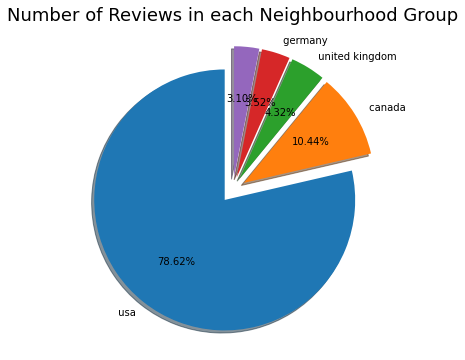

In [50]:
plt.rcParams['figure.figsize'] = (10,6)
reviews = areas_reviews['Book-Rating'][:5]
plt.pie(reviews, labels = areas_reviews['Country'], autopct ='%0.2f%%', startangle =90, explode = [0.1,0.1,0.1,0.1,0.1], shadow = True )
plt.title('Number of Reviews in each Neighbourhood Group', {'fontsize': 18})
plt.show()

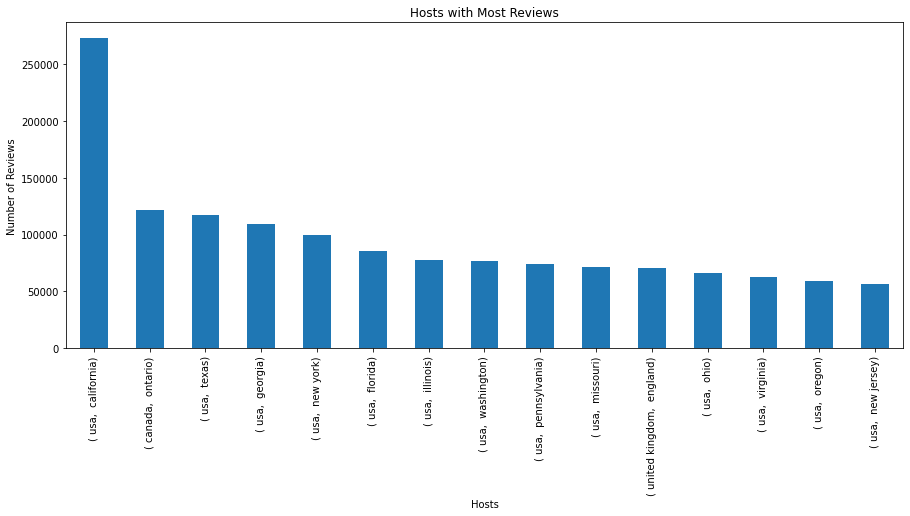

In [51]:
#sort the dataset based on # reviews 
highest_reviews = data.groupby(['Country', 'State'])['Book-Rating'].sum().sort_values(ascending=False)[:15]
highest_reviews.plot.bar(figsize=(15,6))
plt.xlabel('Hosts')
plt.ylabel('Number of Reviews')
plt.title('Hosts with Most Reviews');

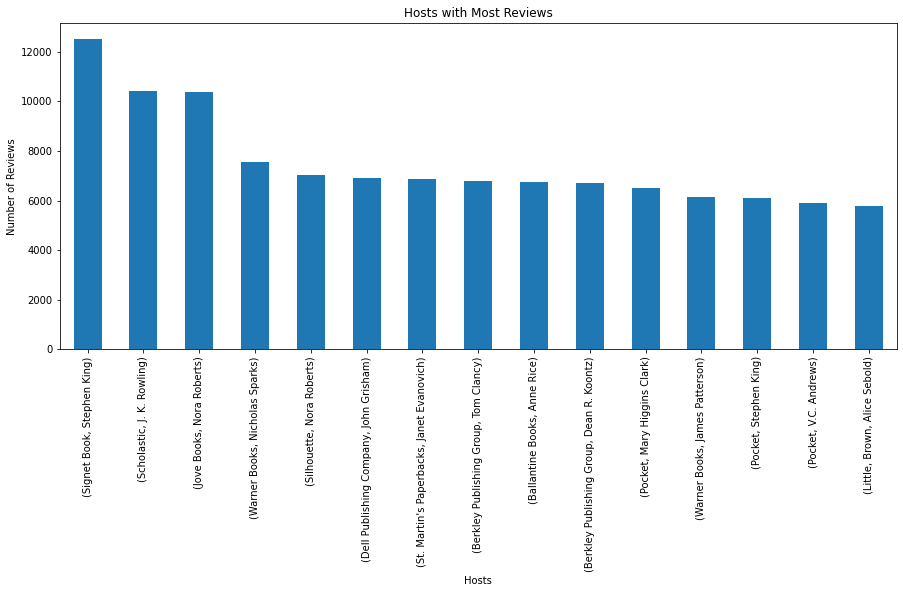

In [52]:
#sort the dataset based on # reviews 
highest_reviews = data.groupby(['Publisher', 'Book-Author'])['Book-Rating'].sum().sort_values(ascending=False)[:15]
highest_reviews.plot.bar(figsize=(15,6))
plt.xlabel('Hosts')
plt.ylabel('Number of Reviews')
plt.title('Hosts with Most Reviews');

## ***Recommenders***


In [53]:
data

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Age,Country,State
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg,2,0,18,usa,california
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,8,5,32,canada,ontario
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg,8,0,32,canada,ontario
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg,8,0,32,canada,ontario
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg,8,0,32,canada,ontario
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031131,087004124X,Anthem,Ayn Rand,1966.0,Caxton Press,http://images.amazon.com/images/P/087004124X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/087004124X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/087004124X.01.LZZZZZZZ.jpg,259589,8,19,usa,florida
1031132,158243123X,A Student of Weather,Elizabeth Hay,2001.0,Counterpoint Press,http://images.amazon.com/images/P/158243123X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/158243123X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/158243123X.01.LZZZZZZZ.jpg,259591,8,39,usa,pennsylvania
1031133,8485900057,Rimas y leyendas (ClÃ¡sicos Fraile ; 3),Gustavo Adolfo BÃ©cquer,1981.0,Ediciones Fraile,http://images.amazon.com/images/P/8485900057.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/8485900057.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/8485900057.01.LZZZZZZZ.jpg,259614,10,22,spain,madrid
1031134,0838934854,Anglo-American Cataloguing Rules,Michael Gorman,1998.0,American Library Association,http://images.amazon.com/images/P/0838934854.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0838934854.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0838934854.01.LZZZZZZZ.jpg,259679,6,27,usa,texas


In [78]:

import requests
from PIL import Image
from io import BytesIO

def popularity_based(dataframe, n):
      popularity_threshold = n

      ratings_count= pd.DataFrame(dataframe.groupby('ISBN')['Book-Rating'].count().reset_index().rename(columns = {'Book-Rating': 'Book-Rating-Count'}))
      # result = pd.merge(data, ratings_count, on='ISBN')
      most_rated= pd.DataFrame(ratings_count[ratings_count['Book-Rating-Count'] >= popularity_threshold]).sort_values(by='Book-Rating-Count',ascending=False)
      # most_popular= pd.DataFrame(most_rated.groupby(['ISBN'])['Book-Rating'].count().sort_values(ascending=False))
      result = pd.merge(data, most_rated, on='ISBN')
      # result=pd.DataFrame(result.groupby(['ISBN','Book-Title','Book-Author','Year-Of-Publication','Publisher','Country','State'])['Book-Rating-Count'].count().reset_index().sort_values(by='Book-Rating-Count', ascending=False))
      books= result['Book-Title'].unique()

      result=result.groupby('Book-Title', as_index=False).first().sort_values(by='Book-Rating-Count',ascending=False)

      # rec = result[['Book-Title', 'Image-URL-L']].head(10)
      # print("For this book we will recommand you:\n")
      for i in result['Image-URL-L']:
        response = requests.get(i)
        print(i)
        img = Image.open(BytesIO(response.content))
        plt.figure()
        plt.imshow(img)


http://images.amazon.com/images/P/0971880107.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0316666343.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0385504209.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0060928336.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0312195516.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/044023722X.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0142001740.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/067976402X.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0671027360.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0446672211.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/059035342X.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0316601950.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0375727345.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/044021145X.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0452282152.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0440214041.01.LZZZZZZZ.jpg
http://images.amazon.com

,Book-Title,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Age,Country,State,Book-Rating-Count
18,Wild Animus,0971880107,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.LZZZZZZZ.jpg,11676,6,32,Other,Other,2502
12,The Lovely Bones: A Novel,0316666343,Alice Sebold,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.LZZZZZZZ.jpg,11676,5,32,Other,Other,1295
9,The Da Vinci Code,0385504209,Dan Brown,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.LZZZZZZZ.jpg,11676,9,32,Other,Other,883
3,Divine Secrets of the Ya-Ya Sisterhood: A Novel,0060928336,Rebecca Wells,1997.0,Perennial,http://images.amazon.com/images/P/0060928336.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060928336.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060928336.01.LZZZZZZZ.jpg,11676,0,32,Other,Other,732
15,The Red Tent (Bestselling Backlist),0312195516,Anita Diamant,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.LZZZZZZZ.jpg,11400,7,49,canada,ontario,723
0,A Painted House,044023722X,John Grisham,2001.0,Dell Publishing Company,http://images.amazon.com/images/P/044023722X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/044023722X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/044023722X.01.LZZZZZZZ.jpg,11676,8,32,Other,Other,647
16,The Secret Life of Bees,0142001740,Sue Monk Kidd,2003.0,Penguin Books,http://images.amazon.com/images/P/0142001740.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0142001740.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0142001740.01.LZZZZZZZ.jpg,11676,0,32,Other,Other,615
8,Snow Falling on Cedars,067976402X,David Guterson,1995.0,Vintage Books USA,http://images.amazon.com/images/P/067976402X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/067976402X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/067976402X.01.LZZZZZZZ.jpg,11676,10,32,Other,Other,614
2,Angels &amp; Demons,0671027360,Dan Brown,2001.0,Pocket Star,http://images.amazon.com/images/P/0671027360.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0671027360.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0671027360.01.LZZZZZZZ.jpg,11676,0,32,Other,Other,586
17,Where the Heart Is (Oprah's Book Club (Paperback)),0446672211,Billie Letts,1998.0,Warner Books,http://images.amazon.com/images/P/0446672211.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0446672211.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0446672211.01.LZZZZZZZ.jpg,11676,10,32,Other,Other,585


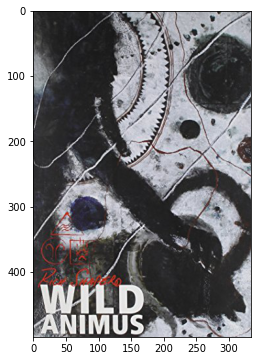

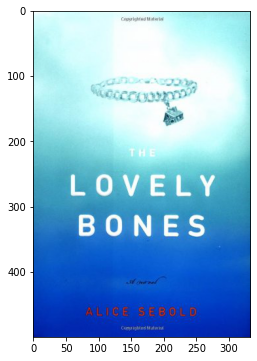

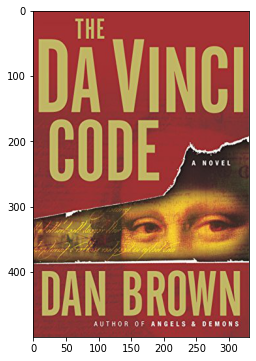

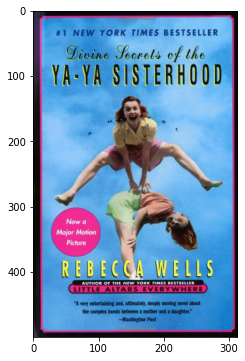

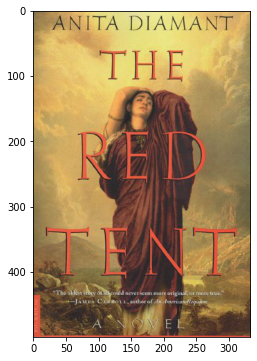

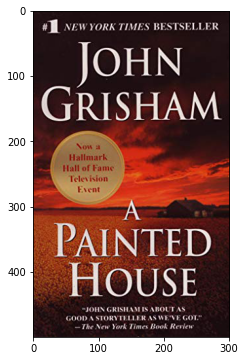

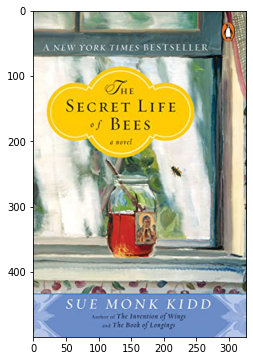

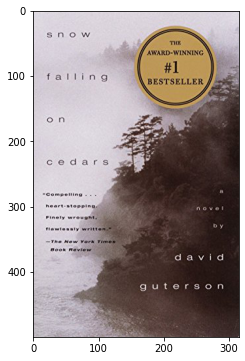

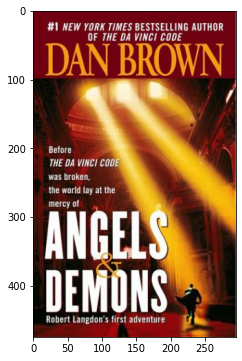

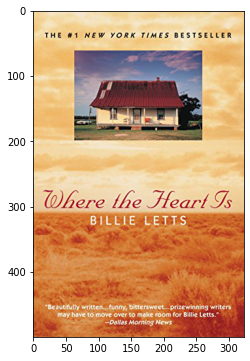

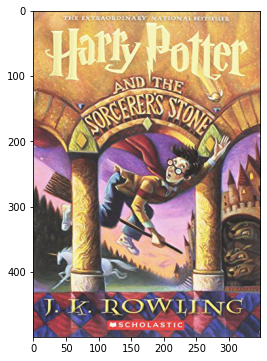

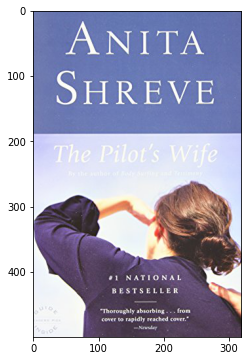

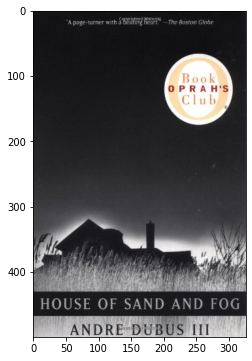

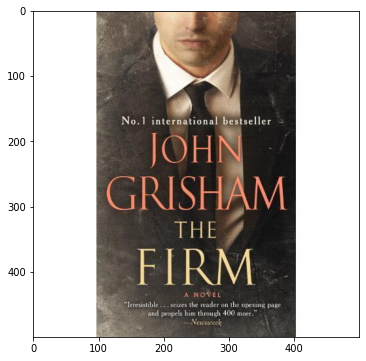

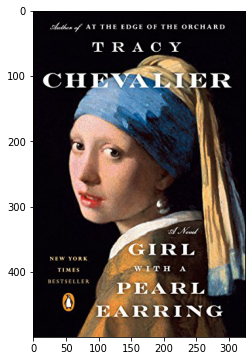

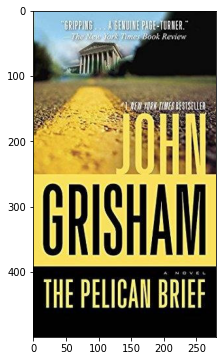

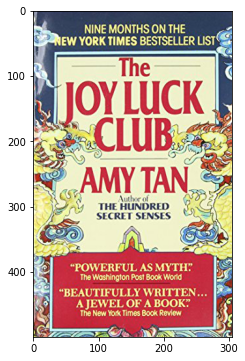

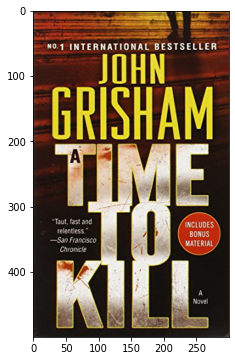

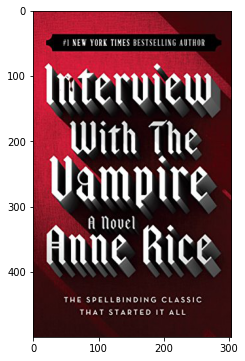

In [79]:
popularity_based(data,500)
# result['Book-Title'].unique